In [ ]:
#keep the file safe, we will try to use this same dataset to do image analysis after we study SVM.

# ---- Regards, Deepesh

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from mlxtend.data import loadlocal_mnist

X, y = loadlocal_mnist(
        images_path='train-images.idx3-ubyte', 
        labels_path='train-labels.idx1-ubyte')


np.savetxt(fname='images.csv', 
           X=X, delimiter=',', fmt='%d')
np.savetxt(fname='labels.csv', 
           X=y, delimiter=',', fmt='%d')

In [ ]:
#create the read_data file just by entering column names as X1 to X784 in excel and save it as image_data.csv
# also upload the file in the jupyter notebook.

In [66]:
data = pd.read_csv("images.csv")
data.head()

labels = pd.read_csv("labels.csv", header = None)
labels.head()

,0
0,5
1,0
2,4
3,1
4,9


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


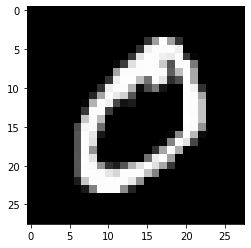

In [62]:
im = data.iloc[[1]].as_matrix().reshape(28,28)
plt.imshow(im, cmap = 'gray')

In [67]:
data = data/255

In [68]:
1000*1000

1000000

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 784 entries, X1 to X784
dtypes: float64(784)
memory usage: 358.9 MB


In [70]:
#why were we doing PCA at all?
# save time

# will we save time is we have to do PCA first on all the data points?

# Reg only = 10s
# PCA + Reg = 10s + 3s = 13s


#divide the data - only a small sample for PCA
#use the complete data for regression only

In [75]:
# train test split: PCA data and non PCA data

from sklearn.model_selection import train_test_split
X_data, X_pca, y_data, y_pca = train_test_split(data, labels, test_size=0.20)

In [76]:
X_pca

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X775,X776,X777,X778,X779,X780,X781,X782,X783,X784
55525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
im = X_data.iloc[[6279]].as_matrix().reshape(28,28)
im.shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(28, 28)

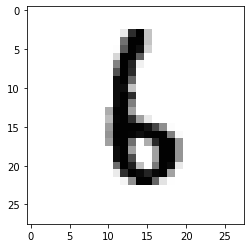

In [78]:
import matplotlib.pyplot as plt
plt.imshow(1 - im, cmap = 'gray')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


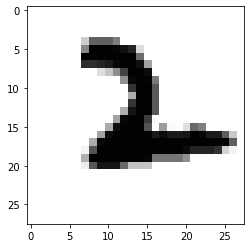

In [79]:
im = X_pca.iloc[[0]].as_matrix().reshape(28,28)
plt.imshow(1-im, cmap = 'gray')

In [80]:
from sklearn.decomposition import PCA
pca = PCA(0.95).fit(X_pca)

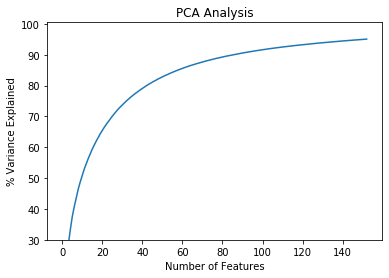

In [81]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [82]:
print('%d components explain 95%% of the variation in data' % pca.n_components_)

153 components explain 95% of the variation in data


In [83]:
pca = PCA(n_components=152, random_state = 0)
pca.fit(X_pca)
X_pca_t = pca.transform(X_pca)
print(X_pca_t.shape)



(12000, 152)


In [84]:
X_data_t = pca.transform(X_data)
print(X_data_t.shape)

(48000, 152)


In [85]:
X_data_t = pd.DataFrame(data = X_data_t)

In [86]:
X_data_t

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,149,150,151
0,1.004025,2.530969,1.548904,-1.150349,1.991833,2.183228,0.743532,-1.501079,-2.279331,-1.984041,...,0.204947,-0.121384,-0.017778,0.156913,-0.136280,-0.197159,-0.142406,-0.135829,0.012665,-0.103663
1,0.349046,-2.969226,-2.443416,1.218331,2.881222,-2.039818,0.390936,1.418803,2.911390,-1.599673,...,0.080577,-0.050727,-0.033318,0.101766,0.271707,-0.075387,-0.161587,-0.110444,-0.000138,0.093283
2,-3.551672,0.775460,-0.337567,-1.107442,-2.770669,-0.490297,-0.503613,-0.676992,-0.098407,0.076275,...,-0.000416,0.108403,0.022782,-0.065942,-0.180649,0.081540,-0.037028,-0.074856,-0.256051,-0.042501
3,2.478107,3.141339,-3.402535,2.963771,0.822033,0.813809,0.100196,1.490956,-0.404037,1.563323,...,0.017489,0.154611,0.098342,0.075993,-0.046159,0.022881,-0.028325,0.105008,-0.193981,-0.293643
4,-2.715003,0.543754,-0.811213,-0.032119,-0.158478,-2.024182,1.669452,-0.866848,0.293294,-1.278794,...,-0.150334,-0.103390,-0.187323,0.265633,-0.157702,0.237888,0.083203,0.229774,-0.168908,0.015012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47995,2.403772,4.102888,-2.639517,1.940637,0.453477,0.572410,-1.339536,1.105061,-0.391152,2.617590,...,-0.104597,-0.085689,0.085765,0.283745,0.081505,0.114783,0.186607,-0.255894,-0.052334,-0.266726
47996,-0.387055,-4.406561,0.492804,2.451024,-0.468948,0.938549,2.168945,-0.365786,-0.905016,1.202403,...,-0.248662,0.089085,0.022519,-0.078036,0.067085,0.254198,-0.109747,-0.150775,-0.104973,0.008694
47997,-1.846101,-1.093365,1.745208,2.276895,0.322493,1.140561,1.215774,-0.054798,-0.546074,1.951879,...,-0.070748,0.021024,0.175233,-0.063783,0.123865,-0.027724,0.035430,-0.121783,-0.069408,-0.243455
47998,-3.364163,0.996594,-0.142306,-0.935830,-2.688254,-0.730431,0.288559,-0.932311,-0.552938,0.297020,...,-0.050172,0.074958,0.090898,0.170048,-0.068457,-0.006090,-0.254296,0.005481,-0.179379,-0.135265


In [87]:
#convery 152 components -> original format 784 pixels to visualize
 
X_pca_invt=pca.inverse_transform(X_pca_t)

In [88]:
X_pca_invt.shape

(12000, 784)

In [89]:
X_pca_invt = pd.DataFrame(data = X_pca_invt)

In [90]:
X_pca_invt

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,2.039419e-16,5.321825e-16,-5.063074e-16,2.190600e-16,-2.740895e-16,-4.692016e-16,-1.979251e-17,1.298590e-16,-4.719333e-16,3.880259e-16,...,0.000546,0.000864,-0.001049,-0.000280,0.0,0.0,0.0,0.0,0.0,0.0
1,4.862241e-17,-3.772954e-16,7.585050e-16,-2.564752e-16,4.892309e-17,-9.477164e-17,-5.051682e-17,5.096637e-17,6.335443e-16,3.839514e-16,...,0.003165,0.000314,-0.000169,-0.000004,0.0,0.0,0.0,0.0,0.0,0.0
2,-9.371509e-18,-3.749986e-16,4.225799e-16,6.681943e-16,8.406125e-18,4.072059e-16,-7.297611e-16,-4.997278e-16,-3.896660e-16,-7.822654e-17,...,-0.000574,-0.001094,-0.001305,-0.000269,0.0,0.0,0.0,0.0,0.0,0.0
3,9.401399e-16,2.237412e-16,-1.455475e-15,1.957696e-16,-5.192361e-16,4.096583e-16,-1.326602e-17,4.683447e-16,-1.026555e-15,-6.889614e-16,...,-0.008819,-0.000654,0.001182,0.000148,0.0,0.0,0.0,0.0,0.0,0.0
4,-4.901125e-16,2.519001e-16,-3.691363e-16,1.364699e-16,2.888319e-16,2.054364e-16,-1.553065e-16,-7.400433e-17,6.549307e-17,1.945375e-16,...,-0.003546,-0.000229,-0.000787,-0.000105,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,-1.345435e-16,4.138218e-16,-2.124537e-16,-2.367646e-16,9.831815e-16,9.718261e-17,-7.284727e-17,-2.904596e-16,3.463920e-16,-8.851906e-17,...,-0.006075,-0.002932,-0.000808,-0.000053,0.0,0.0,0.0,0.0,0.0,0.0
11996,-1.339943e-15,-5.055889e-17,-1.550434e-16,4.860459e-16,5.577281e-16,-7.403263e-17,-2.159505e-16,3.114846e-16,3.895357e-17,-3.177371e-16,...,-0.009135,-0.004279,-0.000502,0.000007,0.0,0.0,0.0,0.0,0.0,0.0
11997,-1.302534e-15,3.877024e-16,-7.909661e-17,1.631850e-16,1.735898e-17,-4.032117e-18,-8.036970e-17,4.426952e-16,-2.182486e-16,-2.693915e-16,...,0.004161,0.002732,0.000772,0.000076,0.0,0.0,0.0,0.0,0.0,0.0
11998,7.431260e-16,3.909917e-16,-1.690411e-16,-3.093618e-16,5.965957e-16,3.149507e-16,-1.869060e-16,3.810777e-16,-5.004995e-16,-6.224285e-16,...,0.000743,0.000410,0.001380,0.000296,0.0,0.0,0.0,0.0,0.0,0.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


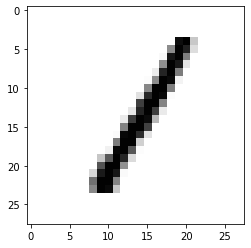

In [91]:
im = X_pca.iloc[[500]].as_matrix().reshape(28,28)
plt.imshow(1 - im, cmap = 'gray')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


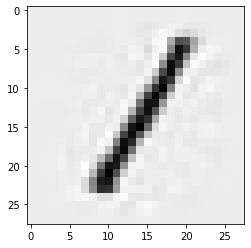

In [92]:
im = X_pca_invt.iloc[[500]].as_matrix().reshape(28,28)
plt.imshow(255 - im, cmap = 'gray')